# Problem 5

-import the necessary libraries:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

Read and load JSON into a dataframe

In [4]:
df = pd.read_json('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Assignment/data/tvshows.json')
df.head()

,id,url,name,type,language,genres,status,runtime,premiered,officialSite,schedule,rating,weight,network,webChannel,externals,image,summary,updated,_links
0,1,http://www.tvmaze.com/shows/1/under-the-dome,Under the Dome,Scripted,English,"[Drama, Science-Fiction, Thriller]",Ended,60,2013-06-24,http://www.cbs.com/shows/under-the-dome/,"{'time': '22:00', 'days': ['Thursday']}",{'average': 6.5},91,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,"{'tvrage': 25988, 'thetvdb': 264492, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p><b>Under the Dome</b> is the story of a sma...,1529612668,{'self': {'href': 'http://api.tvmaze.com/shows...
1,2,http://www.tvmaze.com/shows/2/person-of-interest,Person of Interest,Scripted,English,"[Drama, Action, Crime]",Ended,60,2011-09-22,http://www.cbs.com/shows/person_of_interest/,"{'time': '22:00', 'days': ['Tuesday']}",{'average': 9},96,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,"{'tvrage': 28376, 'thetvdb': 248742, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p>You are being watched. The government has a...,1535507028,{'self': {'href': 'http://api.tvmaze.com/shows...
2,3,http://www.tvmaze.com/shows/3/bitten,Bitten,Scripted,English,"[Drama, Horror, Romance]",Ended,60,2014-01-11,http://bitten.space.ca/,"{'time': '22:00', 'days': ['Friday']}",{'average': 7.6},75,"{'id': 7, 'name': 'Space', 'country': {'name':...",None,"{'tvrage': 34965, 'thetvdb': 269550, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p>Based on the critically acclaimed series of...,1534079818,{'self': {'href': 'http://api.tvmaze.com/shows...
3,4,http://www.tvmaze.com/shows/4/arrow,Arrow,Scripted,English,"[Drama, Action, Science-Fiction]",Running,60,2012-10-10,http://www.cwtv.com/shows/arrow,"{'time': '20:00', 'days': ['Monday']}",{'average': 7.6},99,"{'id': 5, 'name': 'The CW', 'country': {'name'...",None,"{'tvrage': 30715, 'thetvdb': 257655, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,"<p>After a violent shipwreck, billionaire play...",1536062117,{'self': {'href': 'http://api.tvmaze.com/shows...
4,5,http://www.tvmaze.com/shows/5/true-detective,True Detective,Scripted,English,"[Drama, Crime, Thriller]",Running,60,2014-01-12,http://www.hbo.com/true-detective,"{'time': '21:00', 'days': ['Sunday']}",{'average': 8.3},99,"{'id': 8, 'name': 'HBO', 'country': {'name': '...",None,"{'tvrage': 31369, 'thetvdb': 270633, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p>Touch darkness and darkness touches you bac...,1536053668,{'self': {'href': 'http://api.tvmaze.com/shows...


Check for Null Values

In [5]:
df.isnull().sum()

id                0
url               0
name              0
type              0
language          0
genres            0
status            0
runtime           0
premiered         0
officialSite     74
schedule          0
rating            0
weight            0
network           7
webChannel      230
externals         0
image             0
summary           0
updated           0
_links            0
dtype: int64

Only column with Null values is in official site column, network and webchannel. Not a problem
Can now start exploring which genres are most popular amongst viewers. Can start this by exploring the distribution of genres (top 15 only).

In [6]:
# Explode the genres column to create a separate row for each genre
genres = df.explode('genres')

# Count the occurrences of each genre
genre_counts = genres['genres'].value_counts()

# Print the top 10 genres
print(genre_counts.head(10))

Drama              153
Comedy              65
Action              53
Crime               53
Thriller            41
Science-Fiction     37
Romance             29
Horror              23
Adventure           23
Family              17
Name: genres, dtype: int64


Can now display this distribution in a bar chart quite easily.

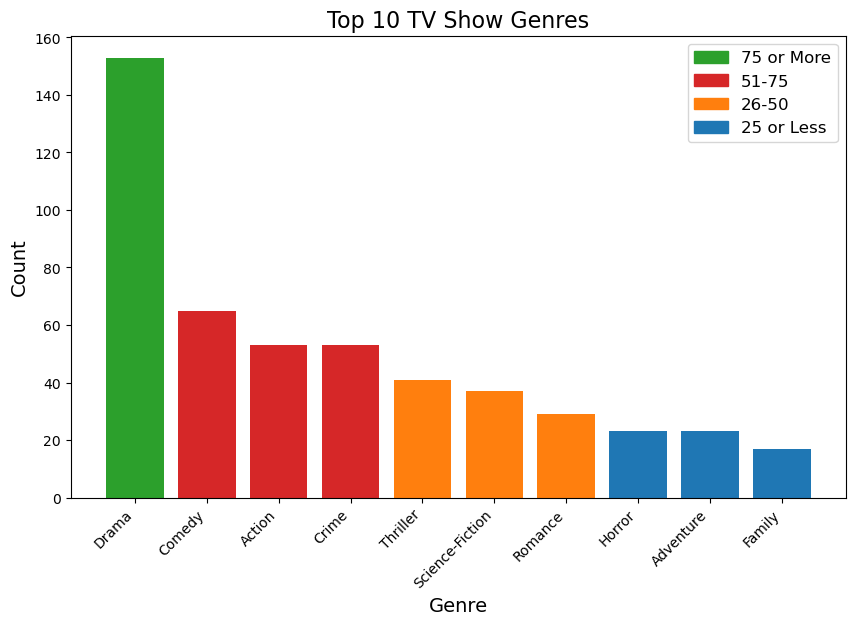

In [7]:
# Get the count of each genre
genre_counts = df.explode('genres')['genres'].value_counts()

# Get the top 10 genres by count
top_10_genres = genre_counts.head(10)

# Define the colors for the bars based on the count intervals
set_colors = ['tab:green', 'tab:red', 'tab:orange', 'tab:blue']
colors = [set_colors[0] if count >= 75 else set_colors[1] if count >= 51 else set_colors[2] if count >= 26 else set_colors[3] for count in top_10_genres.values]

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_genres.index, top_10_genres.values, color=colors)

# Set the chart title and axis labels
ax.set_title('Top 10 TV Show Genres', fontsize=16)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add a legend for the color intervals
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in set_colors]
ax.legend(legend_handles, ['75 or More', '51-75', '26-50', '25 or Less'], loc='best', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.savefig('FREQUENCY_BAR_CHART',bbox_inches= 'tight' ,pad_inches=1)
plt.show()

First Plot is made. Can see that there is a very strong lead in some Genres as it drops of very quickly. This graph gives a quick insight into the popularity level of genres but it alone cannot answer a question about how popular each genres is among viewers. It just represents the frequency that each genre is listed in this dataset. To continue to explore this theme can look into the following quesitons

Are there any trends in the popularity of certain genres over time?

Are some genres more successful in terms of ratings and critical acclaim than others?

Are there pairings of genres that are more popular than others.

### Are there any trends in the popularity of certain genres over time?

In [8]:
df['year'] = df['premiered'].str.extract('(\d{4})').astype(int)

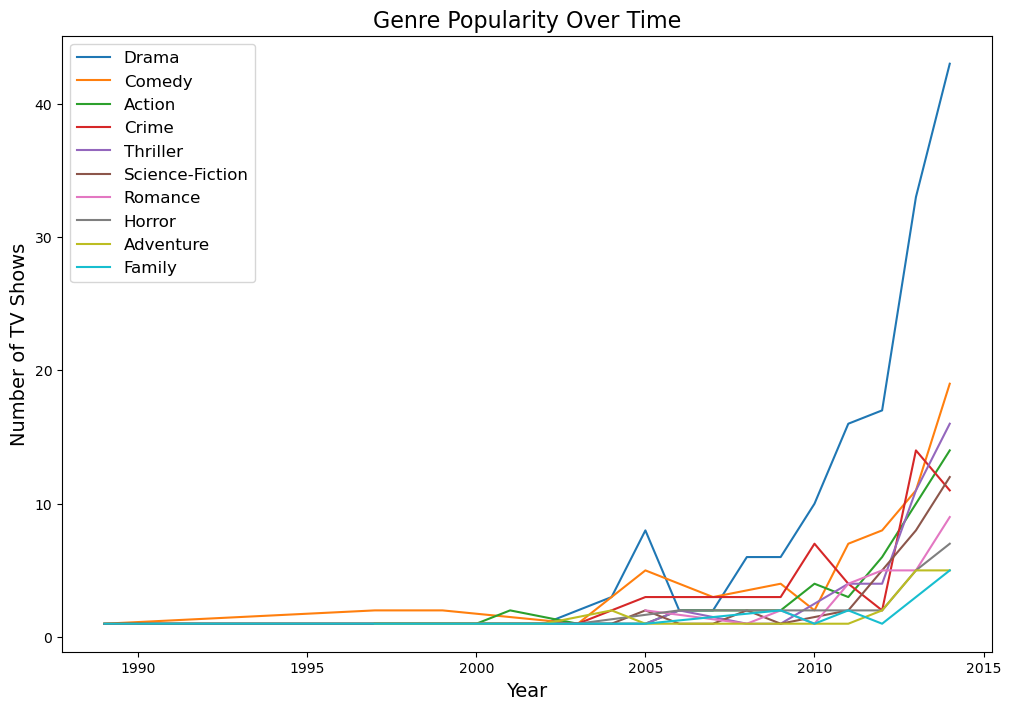

In [9]:
# Create a copy of the DataFrame and explode the 'genres' column
df_genres = df.copy()
df_genres = df_genres.explode('genres')

# Group the data by genre and year, and get the count of TV shows for each group
genre_year_counts = df_genres.groupby(['genres', 'year']).size().reset_index(name='count')

# Plot the data as a line chart
fig, ax = plt.subplots(figsize=(12, 8))
for genre in top_10_genres.index:
    genre_data = genre_year_counts[genre_year_counts['genres'] == genre]
    ax.plot(genre_data['year'], genre_data['count'], label=genre)

ax.set_title('Genre Popularity Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of TV Shows', fontsize=14)
ax.legend(fontsize=12)

plt.savefig('LINE_CHART',bbox_inches= 'tight' ,pad_inches=1)
plt.show()


Line chart shows the growth in popularity of each genre. However this is slightly limited. The dataset is very much skewed to tv shows premiering after the year 2000 and there is very different data for different years. Thus to show the relative popularity of each genre in each year can create a stacked area chart that can give an indication of how many shows of a certain genre premier in relation to how many shows premiered that year.

Another thing to note at this stage is that the dataset does not contain information for how long the shows ran for, only if they where still running or not and hence one cant create any plots that measure continuted popularity over the years but only by the year it premiered. This is a shame as if we had a end date one could create more accurate graphics to display popularity.

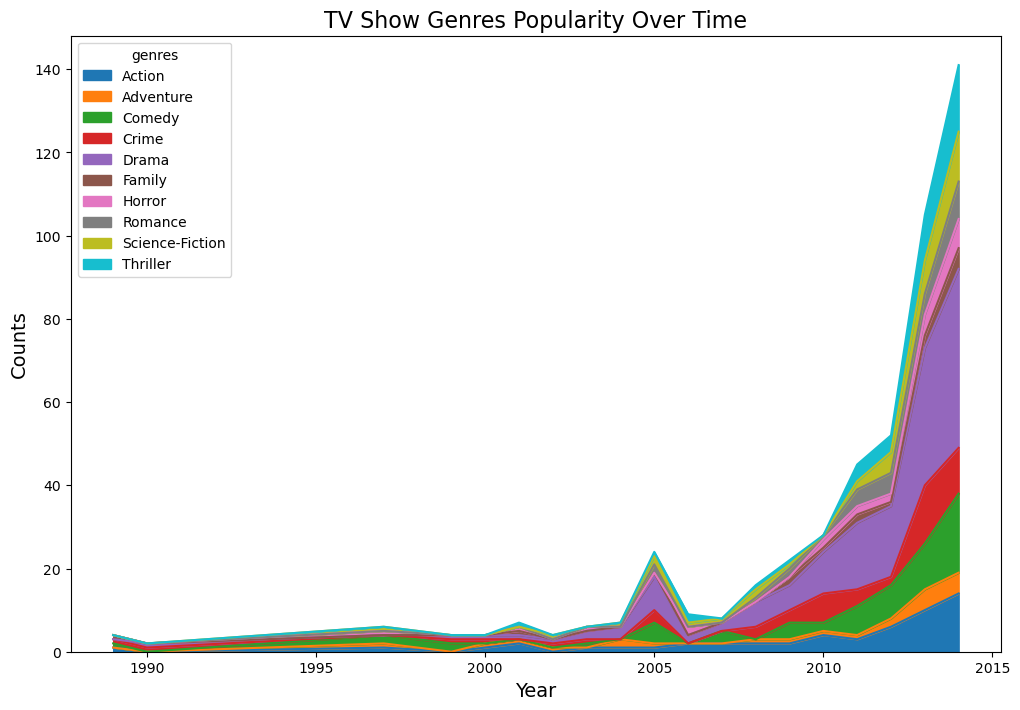

In [10]:
# Group by year and genre, and only keep the top 10 genres by count
year_genre_counts = df.explode('genres').groupby(['year', 'genres']).size().reset_index(name='counts')
year_genre_counts = year_genre_counts[year_genre_counts['genres'].isin(top_10_genres.index)]

# Pivot the data to have years as rows and genres as columns
pivoted_df = year_genre_counts.pivot(index='year', columns='genres', values='counts')

# Plot the pivot table as a stacked area chart
fig, ax = plt.subplots(figsize=(12, 8))
pivoted_df.plot(kind='area', stacked=True, ax=ax)

# Set the chart title and axis labels
ax.set_title('TV Show Genres Popularity Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)

plt.savefig('AREA_CHART',bbox_inches= 'tight' ,pad_inches=1)
plt.show()


From the above area chart one can make observations as to the absolute change in count for each genre along the years, but also their relative market share of all the genres counted that year. Again due to the skewness of the data as there are very big differences among the amount of shows that premiered each year it can be a bit diffucult to interpret as the counts get very low.

Since we are limited to count only the year each show premiered it is a bit difficult to accuratly address how genre popularity (count) has changed year on year. 

### Another way to view genre popularity is not by count but by critical acclaim / ratings.

In [11]:
# Apply lambda function to extract numerical value from "rating" column
df["rating"] = df["rating"].apply(lambda x: x["average"] if isinstance(x, dict) else None)

df.head()

,id,url,name,type,language,genres,status,runtime,premiered,officialSite,...,rating,weight,network,webChannel,externals,image,summary,updated,_links,year
0,1,http://www.tvmaze.com/shows/1/under-the-dome,Under the Dome,Scripted,English,"[Drama, Science-Fiction, Thriller]",Ended,60,2013-06-24,http://www.cbs.com/shows/under-the-dome/,...,6.5,91,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,"{'tvrage': 25988, 'thetvdb': 264492, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p><b>Under the Dome</b> is the story of a sma...,1529612668,{'self': {'href': 'http://api.tvmaze.com/shows...,2013
1,2,http://www.tvmaze.com/shows/2/person-of-interest,Person of Interest,Scripted,English,"[Drama, Action, Crime]",Ended,60,2011-09-22,http://www.cbs.com/shows/person_of_interest/,...,9.0,96,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,"{'tvrage': 28376, 'thetvdb': 248742, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p>You are being watched. The government has a...,1535507028,{'self': {'href': 'http://api.tvmaze.com/shows...,2011
2,3,http://www.tvmaze.com/shows/3/bitten,Bitten,Scripted,English,"[Drama, Horror, Romance]",Ended,60,2014-01-11,http://bitten.space.ca/,...,7.6,75,"{'id': 7, 'name': 'Space', 'country': {'name':...",None,"{'tvrage': 34965, 'thetvdb': 269550, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p>Based on the critically acclaimed series of...,1534079818,{'self': {'href': 'http://api.tvmaze.com/shows...,2014
3,4,http://www.tvmaze.com/shows/4/arrow,Arrow,Scripted,English,"[Drama, Action, Science-Fiction]",Running,60,2012-10-10,http://www.cwtv.com/shows/arrow,...,7.6,99,"{'id': 5, 'name': 'The CW', 'country': {'name'...",None,"{'tvrage': 30715, 'thetvdb': 257655, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,"<p>After a violent shipwreck, billionaire play...",1536062117,{'self': {'href': 'http://api.tvmaze.com/shows...,2012
4,5,http://www.tvmaze.com/shows/5/true-detective,True Detective,Scripted,English,"[Drama, Crime, Thriller]",Running,60,2014-01-12,http://www.hbo.com/true-detective,...,8.3,99,"{'id': 8, 'name': 'HBO', 'country': {'name': '...",None,"{'tvrage': 31369, 'thetvdb': 270633, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p>Touch darkness and darkness touches you bac...,1536053668,{'self': {'href': 'http://api.tvmaze.com/shows...,2014


In [12]:
#Create top 10 genre by count ratings
genre_ratings = df.explode('genres').groupby('genres')['rating'].mean()
genre_ratings=genre_ratings[genre_ratings.index.isin(top_10_genres.index)]

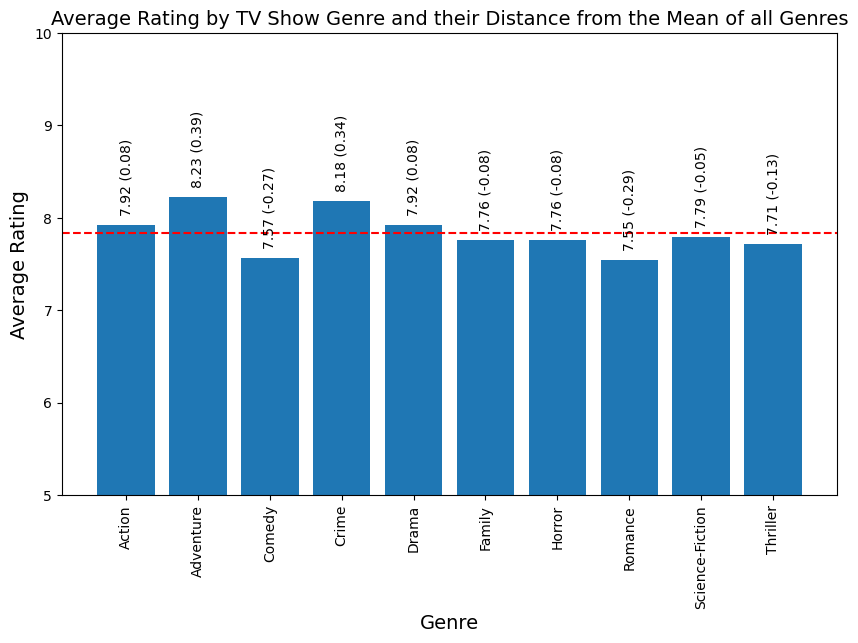

In [13]:


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(genre_ratings.index, genre_ratings.values, color='tab:blue')

# Add mean line
mean_rating = genre_ratings.mean()
ax.axhline(mean_rating, color='red', linestyle='--',label = 'Mean Rating')

# Add labels for each genre's distance from the mean rating
for i, rating in enumerate(genre_ratings):
    label = f'{rating:.2f} ({rating - mean_rating:.2f})'
    ax.text(i, rating + 0.1, label, ha='center', va = 'bottom', rotation = 90, fontsize=10)

# Set the chart title and axis labels
ax.set_title('Average Rating by TV Show Genre and their Distance from the Mean of all Genres', fontsize=14)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)

# Set the y-axis limits
ax.set_ylim(5, 10)

plt.xticks(rotation=90, ha='center')

plt.savefig('BAR_CHART',bbox_inches= 'tight' ,pad_inches=1)
plt.show()


We have a bar chart now that depicts the ratings of the genres that had the most counts and their relative distance from the mean rating for all genres. I have modified this from a basic bar chart due to the ratings all being in a very small interval. I therefore beleive more can be understood from their distance from the mean rather than the absolute value of the rating. I think a limitation with this table is that since most shows have several genres attatched to them, the avg rating for a genre will be calculated with show ratings that can be used in lots of other genres. A possible way to further explore this would be to explore identify variation in the rating attributed to single genres through some form of econometric regressions. 



### Exploring the frequency of genre-pairing. 

the final avenue of exploration into genre popularity in the dataset is in the pairings of genres. Which genres are most frequently paired together? this could inform one as to why the ratings are so similar, wether genres such with similar ratings are so because they are frequently attributed together. To explore this i created a adjacency matrix in which the columns are all the pairings with other genres that a specific genre has.

In [14]:
# Create a new DataFrame with separate rows for each genre
genre_df = df.explode('genres')

# Count the number of occurrences of each genre pair
genre_counts = genre_df.groupby('genres')['genres'].count()

# Create the adjacency matrix DataFrame
adj_matrix = pd.DataFrame(0, index=genre_counts.index, columns=genre_counts.index)

for genres in df['genres']:
    for i in range(len(genres)):
        for j in range(i+1, len(genres)):
            if genres[i] != genres[j]:
                adj_matrix.loc[genres[i], genres[j]] += 1
                adj_matrix.loc[genres[j], genres[i]] += 1

# Print the adjacency matrix
adj_matrix


genres,Action,Adventure,Anime,Comedy,Crime,Drama,Espionage,Family,Fantasy,History,...,Medical,Music,Mystery,Romance,Science-Fiction,Sports,Supernatural,Thriller,War,Western
genres,,,,,,,,,,,,,,,,,,,,,
Action,0,14,1,2,15,29,0,1,3,1,...,0,0,0,0,17,0,1,5,1,1
Adventure,14,0,0,1,1,5,0,1,4,0,...,0,0,0,1,13,0,1,0,0,1
Anime,1,0,0,0,0,2,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
Comedy,2,1,0,0,4,17,0,12,0,0,...,2,0,0,8,2,1,0,1,0,0
Crime,15,1,0,4,0,47,0,0,0,0,...,1,0,3,0,2,0,5,9,0,1
Drama,29,5,2,17,47,0,2,4,8,2,...,4,2,11,24,19,2,16,36,3,3
Espionage,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Family,1,1,0,12,0,4,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
Fantasy,3,4,1,0,0,8,0,0,0,0,...,0,0,0,2,0,0,0,2,0,0


The above dataframe is an adjacency matrix, but in its current medium the data is not incredibally easy to interpret. What can be done with adjaceny matrix's is to turn them into graphs with nodes for each genre and edges that represent the pairings. Initially the graph i made was for all the genres but it was just too mess given the amount of unique genres, as such i limited it to the same genres i have been using so far: the 10 with the most amount of counts in the dataset

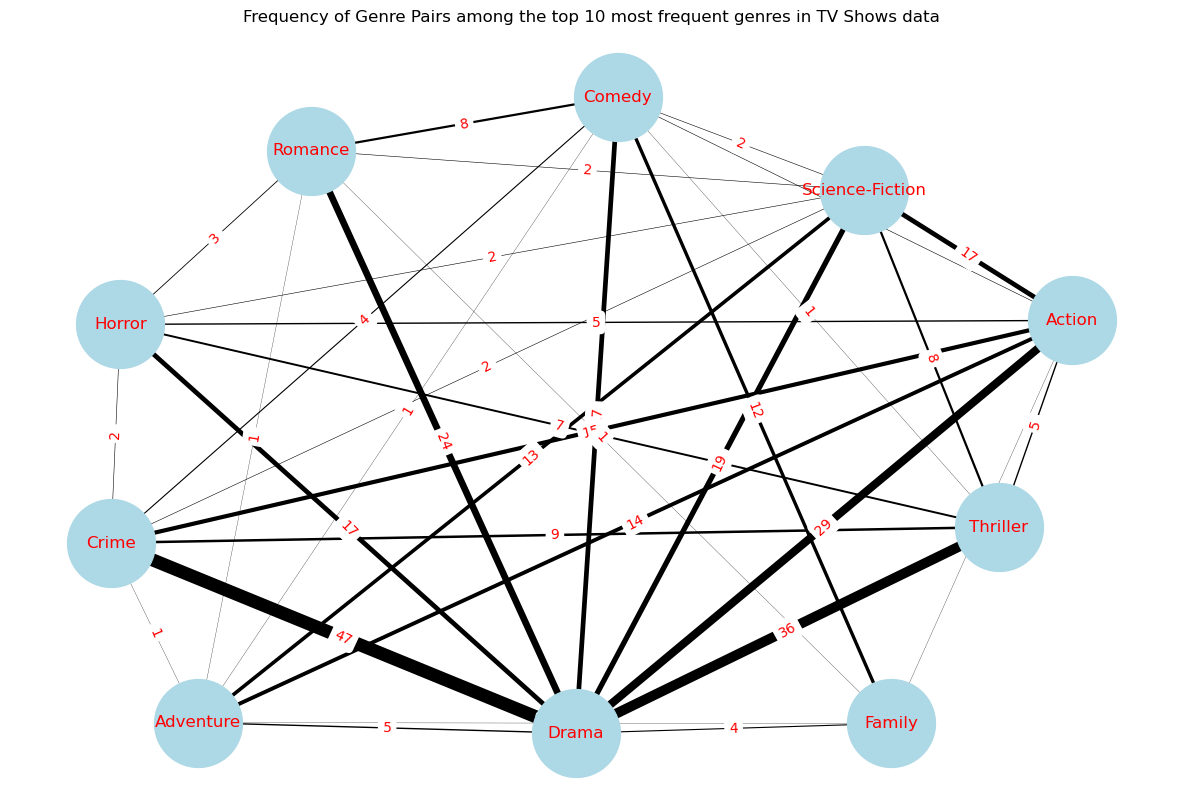

In [15]:
# Select the rows and columns corresponding to the top 10 genres
adj_matrix_top_10 = adj_matrix.loc[top_10_genres.index, top_10_genres.index]

# Create the graph object
G = nx.from_pandas_adjacency(adj_matrix_top_10)

# Define positions of nodes for the graph
pos = nx.spring_layout(G, k=20)

# Draw nodes and edges with weights
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=4000)
nx.draw_networkx_edges(G, pos, width=[d['weight']/5 for (u,v,d) in G.edges(data=True)])
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif',font_color='red')

#Adding the weights to the graph
edge_labels = {(u,v): d['weight'] for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='r')

# Set the graph title
plt.title('Frequency of Genre Pairs among the top 10 most frequent genres in TV Shows data')

# Adjust figure size and spacing
fig = plt.gcf()
fig.set_size_inches(15, 10)

# Set random seed
np.random.seed(11)#Set to 11 as trial and error to find minimal obstruction

# Show the graph

plt.axis('off')

plt.savefig('NETWORK GRAPH',bbox_inches= 'tight' ,pad_inches=1)
plt.show()


The above network graph gives a visual and numerical/quantative insight into combined genre popularity. I have been able to depict the frequency that two genres are attributed to the same show by the thikness of the edge between the nodes but also with a lable. This graph compliments the analysis in the previous question and helps inform why the average ratings are all very close together. Drama and action have been computed to have the same avarage rating, and this resultant to the significant amount of shows that they share (29)